# Computational Intelligence
## Assignment - 1

### GitHub Link : https://github.com/syedjameel/CI-1

written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

## Note: This notebook contains the report aswell

# Task-1

<hr>

### Task 1.1

Write a procedure to check whether or not two planes represented as $\mathbf{r}_{1}=\mathbf{p}_{1}+t_{1} \mathbf{v}_{1}+u_{1} \mathbf{w}_{1}$ and $\mathbf{r}_{2}=\mathbf{p}_{2}+t_{2} \mathbf{v}_{2}+u_{2} \mathbf{w}_{2}$ intersect each other; $\mathbf{r}_{i}, \mathbf{p}_{i}, \mathbf{v}_{i}, \mathbf{w}_{i} \in \mathbb{R}^{3}, t_{i}, u_{i} \in \mathbb{R}$.

Illustrate the correctness of your procedure by showing examples with graphical output.

### Solution 1.1:

#### Procedure:

Since we know that two planes are said to be intersecting at some point if they are not parallel to each other. We can compute if the planes are parallel or not by following steps:

1. To know if the planes are parallel we can compute the normal vector of the plane by computing either the left null space or by computing the cross product of the vectors v1 and w1 for plane 1 and vectors v2 and w2 for the plane 2.


Let $\mathbf{n}_{1} =$ Left null space or the cross product of $\mathbf{v}_{1}, \mathbf{w}_{1}$ and
    $\mathbf{n}_{2} =$ Left null space or the cross product of $\mathbf{v}_{2}, \mathbf{w}_{2}$

2. Now we compute the dot product of the two vectors $\mathbf{n}_{1}$ and $\mathbf{n}_{2}$,
if the dot product of these two normal vectors of the plane is equal to 1 then the planes are parallel, if not then the planes are not parallel.

3. The following figure 1.1 shows that two planes $\mathbf{r}_{1}, \mathbf{r}_{2}$ formed by the vectors $\mathbf{v}_{1}, \mathbf{w}_{1}, \mathbf{v}_{2}, \mathbf{w}_{2}$ respectively. And the point of intersection is shown as a red dot and the the line of intersection is shown in orange color.
4. To find the line and points of intersection we should first find the direction vector and then the starting point of the direction vector. By adding these both we get the equation of the line of intersection.

The code/Graphs are as shown below.


The null space of v1 and w1 vectors are : 
 [[0.]
 [0.]
 [1.]]
The null space of v2 and w2 vectors are : 
 [[1.]
 [0.]
 [0.]]

The planes intersect each other

Point of intersection: [4 8 4]

The direction Vector is :  [0 2 0]

Normal vector n1 is : [0 0 1] and Normal Vector n2 is : [2 0 0] and this means that the planes are Not Parallel


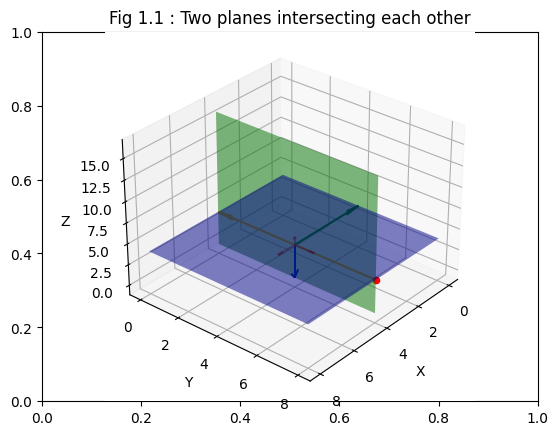

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

def plane_intersection(p1, v1, w1, p2, v2, w2):
    """To detect the intersection of two planes"""
    n1 = np.cross(v1, w1)
    n2 = np.cross(v2, w2)
    d = np.cross(n1, n2)
    if np.dot(n1, n2) == 1: # This is equal to 1 if the planes are parallel
        return None, None
    else:
        # To find one of the Points of intersection of two planes
        r = (p1 + p2) + 4*d
        return r

# Let the vectors be as follows
p1 = np.array([0, 0, 4])
v1 = np.array([1, 0, 0])
w1 = np.array([0, 1, 0])
p2 = np.array([4, 0, 0])
v2 = np.array([0, 1, 0])
w2 = np.array([0, 0, 2])

# find if the planes are intersecting
r = plane_intersection(p1, v1, w1, p2, v2, w2)

print(f"The null space of v1 and w1 vectors are : \n", null_space(np.vstack([v1, w1])))
print(f"The null space of v2 and w2 vectors are : \n", null_space(np.vstack([v2, w2])))

if r is None:
    print("Planes are parallel.")

else:
    print("\nThe planes intersect each other")
    print("\nPoint of intersection:", r)

    fig = plt.figure()
    plt.title('Fig 1.1 : Two planes intersecting each other')
    ax = fig.add_subplot(111, projection='3d')
    u, v = np.mgrid[0:8:2j, 0:8:2j]
    x = p1[0] + u*v1[0] + v*w1[0]
    y = p1[1] + u*v1[1] + v*w1[1]
    z = p1[2] + u*v1[2] + v*w1[2]

    # Plot the surface of the Plane 1
    ax.plot_surface(x, y, z, color='blue', alpha=0.5)

    u, v = np.mgrid[0:8:2j, 0:8:2j]
    x = p2[0] + u*v2[0] + v*w2[0]
    y = p2[1] + u*v2[1] + v*w2[1]
    z = p2[2] + u*v2[2] + v*w2[2]

    # Plot the surface of Plane 2
    ax.plot_surface(x, y, z, color='green', alpha=0.5)

    # Plot the point of intersection
    ax.scatter(r[0], r[1], r[2], c='red')

    n1 = np.cross(v1, w1)   # Normal Vector of Plane 1 i.e n1
    n2 = np.cross(v2, w2)   # Normal Vector of Plane 2 i.e n2

    d = np.cross(n1, n2)    # Direction Vector of the Normal Vectors n1 and n2
    print("\nThe direction Vector is : ", d)

    parallel = "Parallel"
    not_parallel = "Not Parallel"

    print(f"\nNormal vector n1 is : {n1} and Normal Vector n2 is : {n2} and this means that the planes are { parallel if np.dot(n1, n2) == 1 else not_parallel}")

    # The unit vectors (origin basis)
    x_a, y_a, z_a = np.array([4,4,4])
    u, v, w = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    # The origin basis
    ax.quiver(x_a, y_a, z_a, u, v, w, color='red', alpha=0.5)

    # The normal vector of the plane 1
    ax.quiver(4, 4, 4, -4*n1[0], -4*n1[1], -4*n1[2], arrow_length_ratio=0.2, color='blue', label='normal vector to plane 1')

    # The normal vector of the plane 2
    ax.quiver(4, 4, 4, -2*n2[0], -2*n2[1], -2*n2[2], arrow_length_ratio=0.2, color='green', label='normal vector to plane 2')

    # The direction vector in the direction of the line of intersection
    ax.quiver(4, 4, 4, -2*d[0], -2*d[1], -2*d[2], arrow_length_ratio=0.2, color='orange', label='Line of intersection')

    # The starting point of the direction vector
    x_l = 4 + (0 * 2)
    y_l = 0 + (2 * 2)
    z_l = 4 + (0 * 2)

    # The line of intersection of the two planes
    ax.plot([x_l, r[0]], [y_l, r[1]], [z_l, r[2]], color='orange')

    # Setup the labels and view angle
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(30, 40)
    plt.show()


<hr>

### Task 1.2

Given a plane represented as $\mathbf{r}=\mathbf{p}+t \mathbf{v}+u \mathbf{w}$, where $\mathbf{r}, \mathbf{p}, \mathbf{v}, \mathbf{w} \in \mathbb{R}^{3}$, find its representation in a form $\mathbf{n} \cdot\left(\mathbf{r}-\mathbf{r}_{0}\right)=0, \mathbf{n}, \mathbf{r}_{0} \in \mathbb{R}^{n}$. Do it for the cases where:


$\mathbf{v}=\left[\begin{array}{l}1 \\ 7 \\ 4\end{array}\right], \mathbf{w}=\left[\begin{array}{c}2 \\ 8 \\ -5\end{array}\right]$ and $\mathbf{p}=\left[\begin{array}{l}0 \\ 1 \\ 0\end{array}\right]$

$\mathbf{v}=\left[\begin{array}{c}-2 \\ -2 \\ 1\end{array}\right], \mathbf{w}=\left[\begin{array}{c}5 \\ 5 \\ -5\end{array}\right]$ and $\mathbf{p}=\left[\begin{array}{c}-1 \\ 0 \\ 0\end{array}\right]$




Plot planes represented in both ways. Fig. 1 illustrates a plane representation in a form $\mathbf{n} \cdot(\mathbf{r}-$ $\left.\mathbf{r}_{0}\right)=0$

### Solution 1.2


1) for $\mathbf{v} = [1, 7, 4] $, $\mathbf{w} = [2, 8, -5]$
First, We can find the normal vector of $\mathbf{v}$ and $\mathbf{w}$ by either computing their left null space or cross product.

- Then we know that the parametric equation of the plane is given as
$$\mathbf{n} \cdot\left(\mathbf{r}-\mathbf{r}_{0}\right)=0$$

- where $\mathbf{n}$ is the normal vector of the plane, $\mathbf{r}_{0}$ is the starting point $\mathbf{p}$ of the normal vector and $\mathbf{r}$ is any point on the plane.

- Once we have the normal vector $\mathbf{n}$ and the starting point of the normal vector $\mathbf{p}$ the parametric equation of the plane can be written as $n[0](x - p[0]) + n[1](y - p[1]) + n[2](z - p[2]) = 0$

2) Same procedure follows for $\mathbf{v} = [-2, -2, 1] $, $\mathbf{w} = [5, 5, -5]$
- The code is as follows


In [45]:
from scipy.linalg import svd
from sympy import symbols, pprint, Eq

def plane_normal_vector(v, w):
    """
    Calculates the normal vector of a plane from a set of points on the plane.

    Parameters:
    v, w -- a 1D numpy array with shape (n, 1) each

    Returns:
    normal_vector -- the normal vector of the plane, a 1D numpy array with shape (3,).
    """
    normal_vector = np.cross(v, w)
    return normal_vector

### 1. Case1
  $\mathbf{v}=\left[\begin{array}{l}1 \\ 7 \\ 4\end{array}\right], \mathbf{w}=\left[\begin{array}{c}2 \\ 8 \\ -5\end{array}\right]$ and $\mathbf{p}=\left[\begin{array}{l}0 \\ 1 \\ 0\end{array}\right]$

In [46]:
v1 = np.array([1, 7, 4])
w1 = np.array([2, 8, -5])
p1 = np.array([0, 1, 0])


normal_vector1 = plane_normal_vector(v1, w1)
n1 = normal_vector1
print("Case1: The normal vector is : ", normal_vector1)

x, y, z = symbols('x y z')

r1 = n1[0]*(x-p1[0]) + n1[1]*(y-p1[1]) + n1[2]*(z-p1[2])

print("\nThe equation of the plane is : ")
display(Eq(r1, 0, evaluate=False))

Case1: The normal vector is :  [-67  13  -6]

The equation of the plane is : 


Eq(-67*x + 13*y - 6*z - 13, 0)

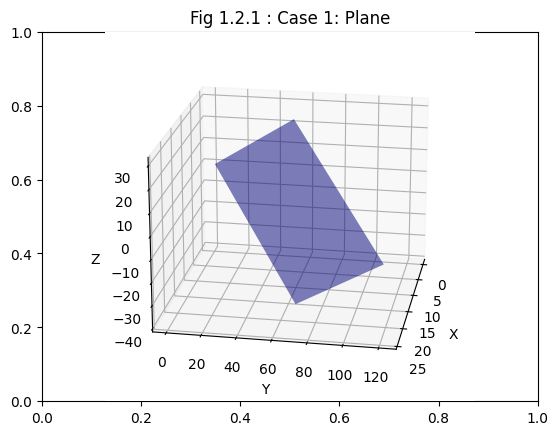

In [47]:
fig = plt.figure()
plt.title('Fig 1.2.1 : Case 1: Plane')
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0:8:2j, 0:8:2j]
x = p1[0] + u*v1[0] + v*w1[0]
y = p1[1] + u*v1[1] + v*w1[1]
z = p1[2] + u*v1[2] + v*w1[2]

# Plot the surface of the Plane 1
ax.plot_surface(x, y, z, color='blue', alpha=0.5)

# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(20, 10)
plt.show()

### 2. Case2
  $\mathbf{v}=\left[\begin{array}{l}-2 \\ -2 \\ 1\end{array}\right], \mathbf{w}=\left[\begin{array}{c}5 \\ 5 \\ -5\end{array}\right]$ and $\mathbf{p}=\left[\begin{array}{l}-1 \\ 0 \\ 0\end{array}\right]$

In [48]:
v2 = np.array([-2, -2, 1])
w2 = np.array([5, 5, -5])
p2 = np.array([-1, 0, 0])


normal_vector2 = plane_normal_vector(v2, w2)
n2 = normal_vector2
print("Case2: The normal vector is : ", normal_vector2)

x, y, z = symbols('x y z')

r2 = n2[0]*(x-p2[0]) + n2[1]*(y-p2[1]) + n2[2]*(z-p2[2])

print("\nThe equation of the plane is : ")
display(Eq(r2, 0, evaluate=False))

Case2: The normal vector is :  [ 5 -5  0]

The equation of the plane is : 


Eq(5*x - 5*y + 5, 0)

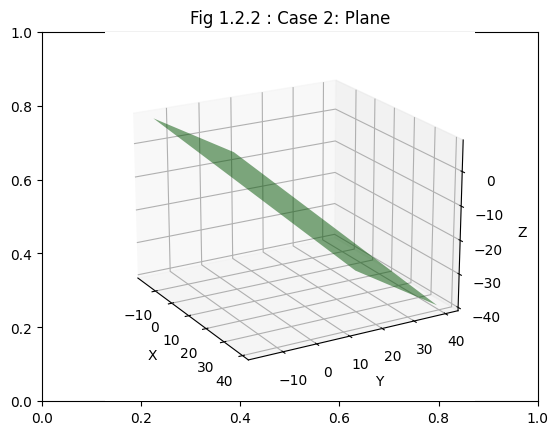

In [49]:
fig = plt.figure()
plt.title('Fig 1.2.2 : Case 2: Plane')
ax = fig.add_subplot(111, projection='3d')

u, v = np.mgrid[0:8:2j, 0:8:2j]
x = p2[0] + u*v2[0] + v*w2[0]
y = p2[1] + u*v2[1] + v*w2[1]
z = p2[2] + u*v2[2] + v*w2[2]

# Plot the surface of Plane 2
ax.plot_surface(x, y, z, color='green', alpha=0.5)

# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(20, -30)
plt.show()

<hr>

### Task 1.3

Given a plane $s$ defined by equation $\mathbf{r}=\left[\begin{array}{l}2 \\ 2 \\ 2\end{array}\right]+t\left[\begin{array}{c}-2 \\ 3 \\ 3\end{array}\right]+u\left[\begin{array}{c}1 \\ 1 \\ -5\end{array}\right]$, find equation of a line $l$, perpendicular to $s$ and passing though the origin. Find a projection of the point $g=\left[\begin{array}{c}-10 \\ -3 \\ 5\end{array}\right]$ on $l$.



### Solution 1.3

To find the projection of the point (-10, -3, 5) onto the line with direction vector [-18, -7, -5].

   1. The direction vector of the line is [-18, -7, -5], we just do the cross product to get that.

   2. Find the vector from the point to the line: If the point is represented by the coordinates (-10, -3, 5), then the vector from the point to the line can be found as follows: (-10 - 0, -3 - 0, 5 - 0) = (-10, -3, 5).
   3. To find the projection of the point onto the line, we need to find the component of the vector from the point to the line that lies along the direction vector. This can be found by taking the dot product of the vector from the point to the line and the direction vector, and dividing by the magnitude of the direction vector squared:


$$projection = ((-10) * -18 + (-3) * -7 + (5) * -5) / (-18^2 + -7^2 + (-5)^2)$$
$$= (176) / (398) = -0.442211$$

   4. Find the coordinates of the projection:

$$x = 0 + projection * -18 = -18 * (0.442211) = -7.95$$
$$y = 0 + projection * -7 = -7 * (0.442211) = -3.09$$
$$z = 0 + projection * -5 = -5 * (0.442211) = -2.21$$

So the projection of the point (-10, -3, 5) onto the line with direction vector [-18, -7, -5] is at the point (-7.95 -3.09 -2.21).

In [50]:
t = -30/199

The direction vector is :  [-18  -7  -5]
The projection component is : 0.44221105527638194
The coordinates of the projection of g is on -7.959798994974875 -3.0954773869346734 -2.21105527638191


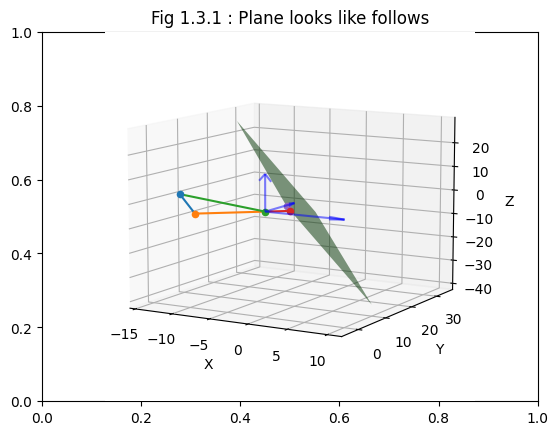

In [51]:
# Initialize the variables
v1 = np.array([-2, 3, 3])
w1 = np.array([1, 1, -5])
p1 = np.array([2, 2, 2])
g = np.array([-10, -3, 5])

n = np.cross(v1, w1)
print("The direction vector is : ", n)

projection = np.dot(g, n) /(n[0]**2 + n[1]**2 + n[2]**2)
print("The projection component is :", projection)

x = 0 + projection * n[0]
y = 0 + projection * n[1]
z = 0 + projection * n[2]

print("The coordinates of the projection of g is on", x, y, z)


fig = plt.figure()
plt.title('Fig 1.3.1 : Plane looks like follows')
ax = fig.add_subplot(111, projection='3d')

ax.scatter(g[0], g[1], g[2], marker='o')
ax.scatter(x, y, z, marker='o')
ax.plot([x, g[0]], [y, g[1]], [z, g[2]])
ax.plot([x, 0], [y, 0], [z, 0])
ax.plot([0, g[0]], [0, g[1]], [0, g[2]])


u, v = np.mgrid[0:8:2j, 0:8:2j]
x = p1[0] + u*v1[0] + v*w1[0]
y = p1[1] + u*v1[1] + v*w1[1]
z = p1[2] + u*v1[2] + v*w1[2]

# Plot the surface of Plane 2
ax.plot_surface(x, y, z, color='green', alpha=0.5)

ax.scatter(0, 0, 0, marker='o')

ax.scatter(-18*t, -7*t, -5*t, marker='o')

ax.scatter(2, 2, 2, marker='o')

ax.plot([0, -18*t], [0, -7*t], [0, -5*t])

# The unit vectors (origin basis)
x_a, y_a, z_a = np.array([0,0,0])
u, v, w = np.array([[10, 0, 0], [0, 10, 0], [0, 0, 15]])

ax.quiver(x_a, y_a, z_a, u, v, w, arrow_length_ratio=0.2, color='blue', label='Origin', alpha=0.5)

# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10, -60)
plt.show()

<hr>

### Task 1.4

Given a plane $s$ defined by equation $\mathbf{r}=\left[\begin{array}{c}-5 \\ 11 \\ 0.5\end{array}\right]+t\left[\begin{array}{l}1 \\ 0 \\ 0\end{array}\right]+u\left[\begin{array}{c}4 \\ 2 \\ -1\end{array}\right]$, and a point $\mathbf{g}=\left[\begin{array}{c}-10 \\ -3 \\ 5\end{array}\right]$, find a point $\mathrm{g}^{*}$ symmetrical to $\mathrm{g}$ relative to the plane $s$.

#### Solution 1.4

the complete procedure to find the point $g^*$ that is symmetrical to $g$ relative to the plane $s$, expressed in mathematical steps using LaTeX:

1. Define the equation of the plane $s$ as follows:

$$\mathbf{r} = \mathbf{p_1} + t \mathbf{v_1} + u \mathbf{w_1}$$

where $\mathbf{p_1} = \begin{bmatrix} -5 \ 11 \ 0.5 \end{bmatrix}$, $\mathbf{v_1} = \begin{bmatrix} 1 \ 0 \ 0 \end{bmatrix}$, and $\mathbf{w_1} = \begin{bmatrix} 4 \ 2 \ -1 \end{bmatrix}$.


2. Find the projection of the point $g$ onto the plane $s$ by subtracting the dot product of the vector from $g$ to $\mathbf{p_1}$ and the normal vector of the plane from $g$:

$$\mathbf{g_{proj}} = \mathbf{g} - \frac{(\mathbf{g} - \mathbf{p_1}) \cdot \mathbf{n}}{\left| \mathbf{n} \right|^2} \mathbf{n}$$

where $\mathbf{n} = \mathbf{v_1} \times \mathbf{w_1}$.

3. Find the midpoint between $\mathbf{g}$ and $\mathbf{g_{proj}}$:

$$\mathbf{midpoint} = \frac{\mathbf{g} + \mathbf{g_{proj}}}{2}$$

4. Find the vector that is perpendicular to the plane $s$ and passes through $g^*$ by subtracting the midpoint from $g$:

$$\mathbf{g^*} - \mathbf{midpoint} = \mathbf{g} - \mathbf{midpoint}$$

5. Add the vector from step 5 to $\mathbf{p_1}$ to find the coordinates of $g^*$:

$$\mathbf{g} = \mathbf{g} - \mathbf{midpoint} + \mathbf{p_1}$$

6. Finally we get the coordinates of $g^*$.


The projection of g on to the normal vector is : 
 [-10.          -5.23606798   0.52786405]

The g_star (Symmetric) of g with respect to the plane is : 
 [-10.          -7.47213595  -3.94427191]


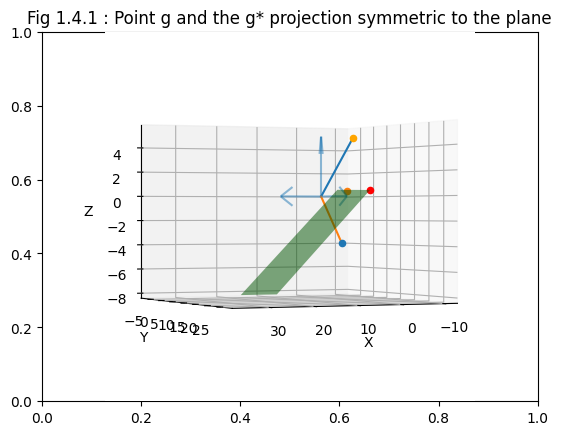

In [60]:
import numpy as np

def projection_onto_plane(g, p, v, w):
    n = plane_normal_vector(v, w)
    d = np.dot(n, (p - g)) / np.linalg.norm(n)
    print("\nThe projection of g on to the normal vector is : \n", g - d * n)
    return g - d * n

def find_symmetrical_point(g, p, v, w):
    projection = projection_onto_plane(g, p, v, w)
    return 2 * projection - g

p1 = np.array([-5, 11, 0.5])
v1 = np.array([1, 0, 0])
w1 = np.array([4, 2, -1])
g = np.array([-10, -3, 5])

g_star = find_symmetrical_point(g, p1, v1, w1)
print("\nThe g_star (Symmetric) of g with respect to the plane is : \n", g_star)

n = plane_normal_vector(v1, w1)
#print("n = ", n)
midpoint = (g_star + g)/2
#print(midpoint)

fig = plt.figure()
plt.title('Fig 1.4.1 : Point g and the g* projection symmetric to the plane')
ax = fig.add_subplot(111, projection='3d')

# Plot the origin
ax.quiver(0, 0, 0, [10, 0, 0], [0, 10, 0], [0, 0, 5], arrow_length_ratio=0.3, alpha=0.5)


ax.scatter(g[0], g[1], g[2], marker='o', color='orange')
ax.scatter(p1[0], p1[1], p1[2], marker='o', color='red')
ax.scatter(g_star[0], g_star[1], g_star[2], marker='o')
ax.scatter(midpoint[0], midpoint[1], midpoint[2], marker='o')

#ax.quiver(p1[0], p1[1], p1[2], n[0], n[1], n[2], arrow_length_ratio=0.3, alpha=0.5)

#print(np.cross(n, -n))

##ax.plot([p1[0], midpoint[0]], [p1[1], midpoint[1]], [p1[2], midpoint[2]])
#ax.plot([g[0], midpoint[0]], [g[1], midpoint[1]], [g[2], midpoint[2]])
#ax.plot([g_star[0], midpoint[0]], [g_star[1], midpoint[1]], [g_star[2], midpoint[2]])

ax.plot([g[0], 0], [g[1], 0], [g[2], 0])
ax.plot([g_star[0], 0], [g_star[1], 0], [g_star[2], 0])

#ax.plot([x, 0], [y, 0], [z, 0])
#ax.plot([0, g[0]], [0, g[1]], [0, g[2]])
#ax.quiver()


u, v = np.mgrid[0:8:2j, 0:8:2j]
x = p1[0] + u*v1[0] + v*w1[0]
y = p1[1] + u*v1[1] + v*w1[1]
z = p1[2] + u*v1[2] + v*w1[2]

# Plot the surface of Plane 2
ax.plot_surface(x, y, z, color='green', alpha=0.5)

# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0, 65)
plt.show()
